<a href="https://colab.research.google.com/github/aindrila61/Aindrila/blob/main/car_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_excel('/content/car_raw.xlsx')
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


In [ ]:
df.isnull().sum()

,0
Company Names,0
Cars Names,0
Engines,0
CC/Battery Capacity,3
HorsePower,0
Total Speed,0
Performance(0 - 100 )KM/H,6
Cars Prices,0
Fuel Types,0
Seats,0


In [ ]:
df.size

13398

In [ ]:
df.shape

(1218, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Names              1218 non-null   object
 1   Cars Names                 1218 non-null   object
 2   Engines                    1218 non-null   object
 3   CC/Battery Capacity        1215 non-null   object
 4   HorsePower                 1218 non-null   object
 5   Total Speed                1218 non-null   object
 6   Performance(0 - 100 )KM/H  1212 non-null   object
 7   Cars Prices                1218 non-null   object
 8   Fuel Types                 1218 non-null   object
 9   Seats                      1218 non-null   object
 10  Torque                     1217 non-null   object
dtypes: object(11)
memory usage: 104.8+ KB


In [ ]:
df

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm
...,...,...,...,...,...,...,...,...,...,...,...
1213,Toyota,Crown Signia,2.5L Hybrid I4,2487 cc,240 hp,180 km/h,7.6 sec,"$43,590 – $48,000",Hybrid (Gas + Electric),5,239 Nm
1214,Toyota,4Runner (6th Gen),2.4L Turbo I4 (i-FORCE MAX Hybrid),2393 cc + Battery,326 hp,180 km/h,6.8 sec,"$50,000",Hybrid,7,630 Nm
1215,Toyota,Corolla Cross,2.0L Gas / 2.0L Hybrid,1987 cc / Hybrid batt,169 – 196 hp,190 km/h,8.0 – 9.2 sec,"$25,210 – $29,135",Gas / Hybrid,5,190 – 210 Nm
1216,Toyota,C-HR+,1.8L / 2.0L Hybrid,1798 / 1987 cc + batt,140 – 198 hp,180 km/h,7.9 – 10.5 sec,33000,Hybrid,5,190 – 205 Nm


***CC/Battery cleaning***

In [ ]:
raw = df["CC/Battery Capacity"].astype(str)    #.astype(str) converts every value in that column to a string

# Allow: digits, dot, comma, space, slash, and ALL hyphen types: - – —
pattern_cc  = r"(?i)([0-9\., /\-–—]*cc)"            # r -> raw string
pattern_kwh = r"(?i)([0-9\., /\-–—]*kwh)"           # (?i) → case-insensitive So it will match cc, CC, Cc, etc.

# *cc -> takes all character until it reaches cc
# regex -> searches pattern inside the str where it is not treating \ as special

df["cc_col"]  = raw.str.extract(pattern_cc)[0]      # [0] is needed as it is sending a series of no. 0 will help to return the first no.
df["kwh_col"] = raw.str.extract(pattern_kwh)[0]

df[["CC/Battery Capacity", "cc_col", "kwh_col"]].head(20)

,CC/Battery Capacity,cc_col,kwh_col
0,3990 cc,3990 cc,NaN
1,6749 cc,6749 cc,NaN
2,"1,200 cc","1,200 cc",NaN
3,"3,982 cc","3,982 cc",NaN
4,"5,204 cc","5,204 cc",NaN
5,"3,994 cc","3,994 cc",NaN
6,"3,982 cc","3,982 cc",NaN
7,"3,996 cc","3,996 cc",NaN
8,"6,498 cc","6,498 cc",NaN
9,"3,900 cc","3,900 cc",NaN


In [ ]:
df[["CC/Battery Capacity", "cc_col", "kwh_col"]].tail(20)

,CC/Battery Capacity,cc_col,kwh_col
1198,"2,000 cc","2,000 cc",NaN
1199,"1,298 cc","1,298 cc",NaN
1200,657 cc,657 cc,NaN
1201,"1,497 cc","1,497 cc",NaN
1202,"1,800 cc","1,800 cc",NaN
1203,"1,598 cc","1,598 cc",NaN
1204,"1,497 cc","1,497 cc",NaN
1205,"1,598 cc","1,598 cc",NaN
1206,"1,798 cc","1,798 cc",NaN
1207,"1,308 cc","1,308 cc",NaN


In [ ]:
df

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque,cc_col,kwh_col
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm,3990 cc,NaN
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm,6749 cc,NaN
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm,"1,200 cc",NaN
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm,"3,982 cc",NaN
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm,"5,204 cc",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,Toyota,Crown Signia,2.5L Hybrid I4,2487 cc,240 hp,180 km/h,7.6 sec,"$43,590 – $48,000",Hybrid (Gas + Electric),5,239 Nm,2487 cc,NaN
1214,Toyota,4Runner (6th Gen),2.4L Turbo I4 (i-FORCE MAX Hybrid),2393 cc + Battery,326 hp,180 km/h,6.8 sec,"$50,000",Hybrid,7,630 Nm,2393 cc,NaN
1215,Toyota,Corolla Cross,2.0L Gas / 2.0L Hybrid,1987 cc / Hybrid batt,169 – 196 hp,190 km/h,8.0 – 9.2 sec,"$25,210 – $29,135",Gas / Hybrid,5,190 – 210 Nm,1987 cc,NaN
1216,Toyota,C-HR+,1.8L / 2.0L Hybrid,1798 / 1987 cc + batt,140 – 198 hp,180 km/h,7.9 – 10.5 sec,33000,Hybrid,5,190 – 205 Nm,1798 / 1987 cc,NaN


In [ ]:
#from google.colab import data_table
#data_table.enable_dataframe_formatter()

#df

In [ ]:
raw = df["CC/Battery Capacity"].astype(str)

# 1️⃣ Flags for presence of cc and kwh
has_cc = raw.str.contains("cc", case=False, na=False)
has_kwh = raw.str.contains("kwh", case=False, na=False)

# 2️⃣ Empty output columns
df["cc_col"] = pd.NA
df["kwh_col"] = pd.NA

# 3️⃣ Regex patterns for extraction WHEN both are present
pattern_cc  = r"(?i)([0-9\., /\-–—]*cc)"
pattern_kwh = r"(?i)([0-9\., /\-–—]*kwh)"

# 4️⃣ Rows that contain BOTH cc and kwh → extract separately
both = has_cc & has_kwh
df.loc[both, "cc_col"]  = raw[both].str.extract(pattern_cc)[0]
df.loc[both, "kwh_col"] = raw[both].str.extract(pattern_kwh)[0]

# 5️⃣ Rows that contain ONLY cc → copy full original text
only_cc = has_cc & ~has_kwh
df.loc[only_cc, "cc_col"] = raw[only_cc]

# 6️⃣ Rows that contain ONLY kwh → copy full original text
only_kwh = has_kwh & ~has_cc
df.loc[only_kwh, "kwh_col"] = raw[only_kwh]

# Show result
df[["CC/Battery Capacity", "cc_col", "kwh_col"]].head(20)


,CC/Battery Capacity,cc_col,kwh_col
0,3990 cc,3990 cc,<NA>
1,6749 cc,6749 cc,<NA>
2,"1,200 cc","1,200 cc",<NA>
3,"3,982 cc","3,982 cc",<NA>
4,"5,204 cc","5,204 cc",<NA>
5,"3,994 cc","3,994 cc",<NA>
6,"3,982 cc","3,982 cc",<NA>
7,"3,996 cc","3,996 cc",<NA>
8,"6,498 cc","6,498 cc",<NA>
9,"3,900 cc","3,900 cc",<NA>


In [ ]:
clean_pattern = r"[^0-9/\-–—\.]"
df["kwh_col"] = df["kwh_col"].str.replace(clean_pattern, "", regex=True)

df["cc_col"]  = df["cc_col"].str.replace(r"\(.*?\)", "", regex=True)  # () part will remove ()
df["cc_col"]  = df["cc_col"].str.replace(r"[^0-9/\-–—\.]", "", regex=True)
df

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque,cc_col,kwh_col
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm,3990,<NA>
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm,6749,<NA>
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm,1200,<NA>
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm,3982,<NA>
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm,5204,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,Toyota,Crown Signia,2.5L Hybrid I4,2487 cc,240 hp,180 km/h,7.6 sec,"$43,590 – $48,000",Hybrid (Gas + Electric),5,239 Nm,2487,<NA>
1214,Toyota,4Runner (6th Gen),2.4L Turbo I4 (i-FORCE MAX Hybrid),2393 cc + Battery,326 hp,180 km/h,6.8 sec,"$50,000",Hybrid,7,630 Nm,2393,<NA>
1215,Toyota,Corolla Cross,2.0L Gas / 2.0L Hybrid,1987 cc / Hybrid batt,169 – 196 hp,190 km/h,8.0 – 9.2 sec,"$25,210 – $29,135",Gas / Hybrid,5,190 – 210 Nm,1987/,<NA>
1216,Toyota,C-HR+,1.8L / 2.0L Hybrid,1798 / 1987 cc + batt,140 – 198 hp,180 km/h,7.9 – 10.5 sec,33000,Hybrid,5,190 – 205 Nm,1798/1987,<NA>


In [ ]:
import re

# assume df, cc_col, kwh_col already created

def convert_range_to_mean(val):
    if pd.isna(val) or val == "":
        return np.nan

    s = str(val)

    # unify all dash types to normal '-'
    s = s.replace("–", "-").replace("—", "-")

    # Extract ALL numbers (handles /20-40, 1200/1400, 45-89)
    nums = re.findall(r"\d+(?:\.\d+)?", s)

    # CASE 1: exactly 2 numbers ⇒ take mean
    if len(nums) == 2:
        a = float(nums[0])
        b = float(nums[1])
        return (a + b) / 2

    # CASE 2: exactly 1 number ⇒ return it
    if len(nums) == 1:
        return float(nums[0])

    # CASE 3: more than 2 numbers ⇒ return last number (rare messy case)
    if len(nums) > 2:
        return float(nums[-1])   # if 20/30/40 return 40

    return np.nan


# Apply to cc_col and kwh_col
df["cc_num"]  = df["cc_col"].apply(convert_range_to_mean)    # make cc_numeric col
df["kwh_num"] = df["kwh_col"].apply(convert_range_to_mean)

# If you want to overwrite cc_col/kwh_col instead:
# df["cc_col"]  = df["cc_col"].apply(convert_range_to_mean)
# df["kwh_col"] = df["kwh_col"].apply(convert_range_to_mean)


In [ ]:
df.loc[[216, 238], ["cc_num","kwh_num"]]

,cc_num,kwh_num
216,NaN,36.436
238,6.0,NaN


In [ ]:
df.loc[216, "kwh_num"] = 68.8
df.loc[238, "cc_num"] = 2975
df.loc[[216, 238], ["cc_num","kwh_num"]]

,cc_num,kwh_num
216,NaN,68.8
238,2975.0,NaN


***Horsepower cleaning***

In [ ]:
raw1 = df["HorsePower"].astype(str)

# 1️⃣ Flags for presence of hp
has_hp = raw1.str.contains("hp", case=False, na=False)

# 2️⃣ Empty output columns
df["hp_col"] = pd.NA

# 3️⃣ Regex patterns for extraction
pattern_hp  = r"(?i)([0-9\., /\-–—]*hp)"


# 5️⃣ Rows that contain ONLY hp → copy full original text
only_hp = has_hp
df.loc[only_hp, "hp_col"] = raw1[only_hp]

df["hp_col"] = df["hp_col"].str.replace(",", "", regex=False)   #1,020 -> 1020

# Show result
#df[["HorsePower","hp_col"]].head(20)

def convert_range_to_mean(val):
    if pd.isna(val) or val == "":
        return np.nan

    s = str(val)

    # unify all dash types to normal '-'
    s = s.replace("–", "-").replace("—", "-")

    # Extract ALL numbers (handles /20-40, 1200/1400, 45-89)
    nums = re.findall(r"\d+(?:\.\d+)?", s)

    # CASE 1: exactly 2 numbers ⇒ take mean
    if len(nums) == 2:
        a = float(nums[0])
        b = float(nums[1])
        return (a + b) / 2

    # CASE 2: exactly 1 number ⇒ return it
    if len(nums) == 1:
        return float(nums[0])

    # CASE 3: more than 2 numbers ⇒ return last number (rare messy case)
    if len(nums) > 2:
        return float(nums[-1])   # if 20/30/40 return 40

    return np.nan


# Apply to hp_col
df["hp_num"]  = df["hp_col"].apply(convert_range_to_mean)


***Total Speed Cleaning***

In [ ]:
raw2 = df["Total Speed"].astype(str)

# 1️⃣ Flags for presence of km/hr
has_ts = raw2.str.contains(r"km/h", case=False, na=False)

# 2️⃣ Empty output columns
df["ts_col"] = pd.NA


# 5️⃣ Rows that contain ONLY hp → copy full original text
only_ts = has_ts
df.loc[only_ts, "ts_col"] = raw2[only_ts]
df["ts_col"]  = df["ts_col"].str.replace(r"\(.*?\)", "", regex=True)   # remove (est.)
df["ts_col"]  = df["ts_col"].str.replace(r"[^0-9]", "", regex=True)

# Show result
df[["Total Speed","ts_col"]].head(20)

,Total Speed,ts_col
0,340 km/h,340
1,250 km/h,250
2,165 km/h,165
3,250 km/h,250
4,320 km/h,320
5,341 km/h,341
6,314 km/h,314
7,318 km/h,318
8,356 km/h,356
9,340 km/h,340


In [ ]:
df["ts_col"].isnull().value_counts()

,count
ts_col,
False,1218


In [ ]:
df.shape

(1218, 18)

In [ ]:
df.loc[1147,"ts_col"]

'300'

***Performance Cleaning***

In [ ]:
raw4 = df["Performance(0 - 100 )KM/H"].astype(str)

# 2️⃣ Empty output columns
df["perf_col"] = raw4

df["perf_col"]  = df["perf_col"].str.replace(r"\(.*?\)", "", regex=True)  # () part will remove ()
df["perf_col"]  = df["perf_col"].str.replace(r"[^0-9/\-–—\.]", "", regex=True)


In [ ]:
def convert_range_to_mean(val):
    if pd.isna(val) or val == "":
        return np.nan

    s = str(val)

    # unify all dash types to normal '-'
    s = s.replace("–", "-").replace("—", "-")

    # Extract ALL numbers (handles /20-40, 1200/1400, 45-89)
    nums = re.findall(r"\d+(?:\.\d+)?", s)

    # CASE 1: exactly 2 numbers ⇒ take mean
    if len(nums) == 2:
        a = float(nums[0])
        b = float(nums[1])
        return (a + b) / 2

    # CASE 2: exactly 1 number ⇒ return it
    if len(nums) == 1:
        return float(nums[0])

    # CASE 3: more than 2 numbers ⇒ return last number (rare messy case)
    if len(nums) > 2:
        return float(nums[-1])   # if 20/30/40 return 40

    return np.nan


# Apply to perf_col
df["perf_col"]  = df["perf_col"].apply(convert_range_to_mean)
df[["Performance(0 - 100 )KM/H","perf_col"]].tail()


,Performance(0 - 100 )KM/H,perf_col
1213,7.6 sec,7.60
1214,6.8 sec,6.80
1215,8.0 – 9.2 sec,8.60
1216,7.9 – 10.5 sec,9.20
1217,6.0 – 8.1 sec,7.05


***Car Price Cleaning***

In [ ]:
raw5 = df["Cars Prices"].astype(str)

# Empty output columns
df["car_price"] = raw5
df["car_price"]  = df["car_price"].str.replace(r"[^0-9/\-–—\.]", "", regex=True)

def convert_range_to_mean(val):
    if pd.isna(val) or val == "":
        return np.nan

    s = str(val)

    # unify all dash types to normal '-'
    s = s.replace("–", "-").replace("—", "-")

    # Extract ALL numbers (handles /20-40, 1200/1400, 45-89)
    nums = re.findall(r"\d+(?:\.\d+)?", s)

    # CASE 1: exactly 2 numbers ⇒ take mean
    if len(nums) == 2:
        a = float(nums[0])
        b = float(nums[1])
        return (a + b) / 2

    # CASE 2: exactly 1 number ⇒ return it
    if len(nums) == 1:
        return float(nums[0])

    # CASE 3: more than 2 numbers ⇒ return last number (rare messy case)
    if len(nums) > 2:
        return float(nums[-1])   # if 20/30/40 return 40

    return np.nan

df["car_price"]  = df["car_price"].apply(convert_range_to_mean)
df[["Cars Prices","car_price"]].tail()



,Cars Prices,car_price
1213,"$43,590 – $48,000",45795.0
1214,"$50,000",50000.0
1215,"$25,210 – $29,135",27172.5
1216,33000,33000.0
1217,"$29,000 – $43,000",36000.0


***Torque Cleaning***

In [ ]:
raw6 = df["Torque"].astype(str)

# 1️⃣ Flags for presence of hp
has_tor = raw6.str.contains("Nm", case=False, na=False)

# 2️⃣ Empty output columns
df["tor_col"] = pd.NA

# 3️⃣ Regex patterns for extraction
pattern_tor  = r"(?i)([0-9\., /\-–—]*Nm)"


# 5️⃣ Rows that contain ONLY hp → copy full original text
only_tor = has_tor
df.loc[only_tor, "tor_col"] = raw6[only_tor]

df["tor_col"] = df["tor_col"].str.replace(",", "", regex=False)   #1,020 -> 1020



def convert_range_to_mean(val):
    if pd.isna(val) or val == "":
        return np.nan

    s = str(val)

    # unify all dash types to normal '-'
    s = s.replace("–", "-").replace("—", "-")

    # Extract ALL numbers (handles /20-40, 1200/1400, 45-89)
    nums = re.findall(r"\d+(?:\.\d+)?", s)

    # CASE 1: exactly 2 numbers ⇒ take mean
    if len(nums) == 2:
        a = float(nums[0])
        b = float(nums[1])
        return (a + b) / 2

    # CASE 2: exactly 1 number ⇒ return it
    if len(nums) == 1:
        return float(nums[0])

    # CASE 3: more than 2 numbers ⇒ return last number (rare messy case)
    if len(nums) > 2:
        return float(nums[-1])   # if 20/30/40 return 40

    return np.nan


# Apply to hp_col
df["tor_num"]  = df["tor_col"].apply(convert_range_to_mean)
df.tor_num.head()


,tor_num
0,800.0
1,900.0
2,120.0
3,900.0
4,560.0


In [ ]:
output_path = "/content/cleaned_data.xlsx"
df.to_excel(output_path, index=False)

output_path

'/content/cleaned_data.xlsx'

In [ ]:
df["Company Names"].value_counts()

,count
Company Names,
Nissan,149
Volkswagen,109
Porsche,96
Mazda,87
Mitsubishi,60
GMC,59
Chevrolet,58
Peugeot,54
Kia,54


In [ ]:
df["Company Names"].unique()

array(['FERRARI', 'ROLLS ROYCE', 'Ford', 'MERCEDES', 'AUDI', 'BMW',
       'ASTON MARTIN', 'BENTLEY', 'LAMBORGHINI', 'TOYOTA', 'NISSAN',
       'ROLLS ROYCE ', 'VOLVO', 'KIA', 'HONDA', 'KIA  ', 'HYUNDAI',
       'MAHINDRA', 'MARUTI SUZUKI', 'Nissan', 'Volkswagen', 'Porsche',
       'Cadillac', 'Tata Motors', 'Tesla', 'Jeep', 'Mazda', 'Chevrolet',
       'GMC', 'Kia', 'Peugeot', 'Bugatti', 'Volvo', 'Jaguar Land Rover',
       'Acura', 'Mitsubishi', 'Toyota'], dtype=object)

In [ ]:
df["Company Names"] = df["Company Names"].str.strip().str.title()

In [ ]:
df["Company Names"].unique()

array(['Ferrari', 'Rolls Royce', 'Ford', 'Mercedes', 'Audi', 'Bmw',
       'Aston Martin', 'Bentley', 'Lamborghini', 'Toyota', 'Nissan',
       'Volvo', 'Kia', 'Honda', 'Hyundai', 'Mahindra', 'Maruti Suzuki',
       'Volkswagen', 'Porsche', 'Cadillac', 'Tata Motors', 'Tesla',
       'Jeep', 'Mazda', 'Chevrolet', 'Gmc', 'Peugeot', 'Bugatti',
       'Jaguar Land Rover', 'Acura', 'Mitsubishi'], dtype=object)

In [ ]:
df["Company Names"].value_counts()

,count
Company Names,
Nissan,159
Volkswagen,109
Porsche,96
Mazda,87
Kia,71
Mitsubishi,60
Gmc,59
Chevrolet,58
Peugeot,54


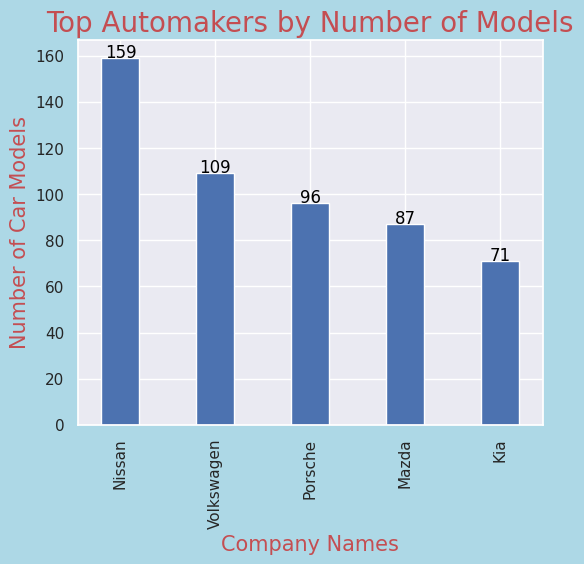

In [ ]:
# Count number of cars per company and select top 5
top5 = df["Company Names"].value_counts().head(5)

# Plot with smaller bar width
ax = top5.plot(kind='bar', width=0.4, figsize=(6,5))

plt.title("Top Automakers by Number of Models", fontsize=20, color='r')
plt.xlabel("Company Names", fontsize=15, color='r')
plt.ylabel("Number of Car Models", fontsize=15, color='r')

# ADD DATA LABELS
for i, value in enumerate(top5):
    plt.text(i, value + 0.3, str(value), ha='center', fontsize=12, color='black')

plt.show()


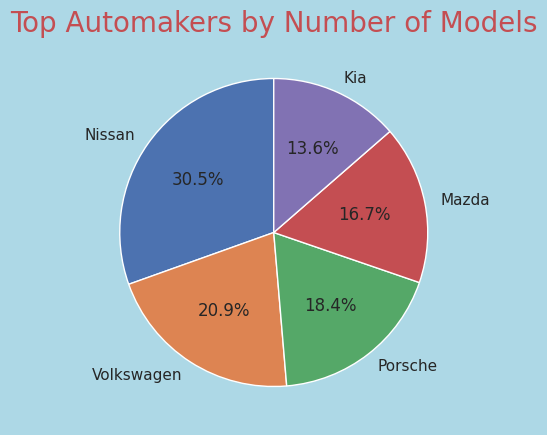

In [ ]:
# Count number of cars per company and select top 5
top5 = df["Company Names"].value_counts().head(5)

# Pie chart
plt.figure(figsize=(5,5))
plt.pie(top5, labels=top5.index, autopct='%1.1f%%', startangle=90)

plt.title("Top Automakers by Number of Models", fontsize=20, color='r')
plt.show()


In [ ]:
conditions = [
    df["car_price"] < 20000,
    df["car_price"] < 100000,
    df["car_price"] < 500000
]

choices = ["Budget", "Mid-Range", "Premium"]

df["Price Segment"] = np.select(conditions, choices, default="Luxury")   # select work like switch

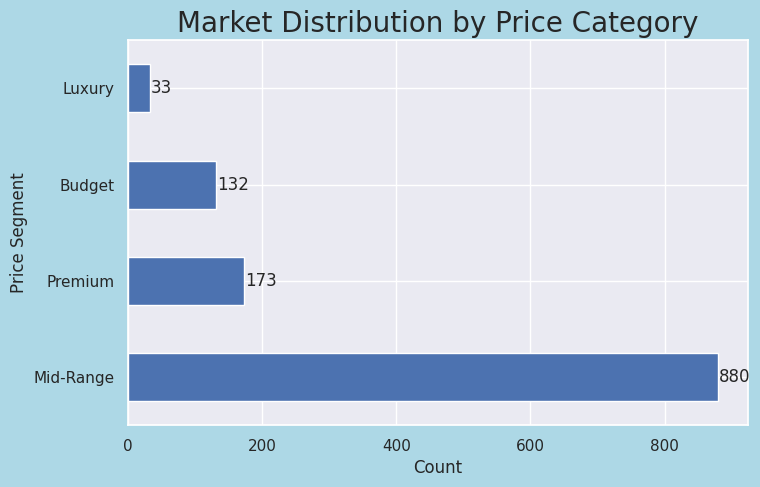

In [ ]:
counts = df["Price Segment"].value_counts()

ax = counts.plot(kind='barh', figsize=(8,5))

for i, v in enumerate(counts):
    plt.text(v + 1, i, str(v), va='center')

plt.title("Market Distribution by Price Category", fontsize=20)
plt.xlabel("Count")
plt.ylabel("Price Segment")

plt.show()


In [ ]:
df["kwh_num"] = df["kwh_num"].fillna(0)


# 1. Base mask for EV / Hybrid rows
is_ev_hybrid = df["Fuel Types"].isin(["Electric", "Hybrid"])

# 2. Conditions (in order, like SWITCH(TRUE()))
conditions = [
    is_ev_hybrid & (df["kwh_num"] < 40),
    is_ev_hybrid & (df["kwh_num"] < 70),
    is_ev_hybrid & (df["kwh_num"] >= 70),
]

choices = [
    "Small (<40 kWh)",
    "Medium (40–69 kWh)",
    "Long-Range (70+ kWh)",
]

# 3. Create new segment column
seg = np.select(conditions, choices, default="")
df["EV_hybrid_Segment"] = pd.Series(seg).replace("", np.nan)


In [ ]:
seg_avg = (
    df.dropna(subset=["EV_hybrid_Segment", "car_price"])     # remove the nan col like petrol & diesel directly
      .groupby("EV_hybrid_Segment")["car_price"]
      .mean()
)

seg_avg


,car_price
EV_hybrid_Segment,
Long-Range (70+ kWh),82493.913043
Medium (40–69 kWh),33991.666667
Small (<40 kWh),137374.565217


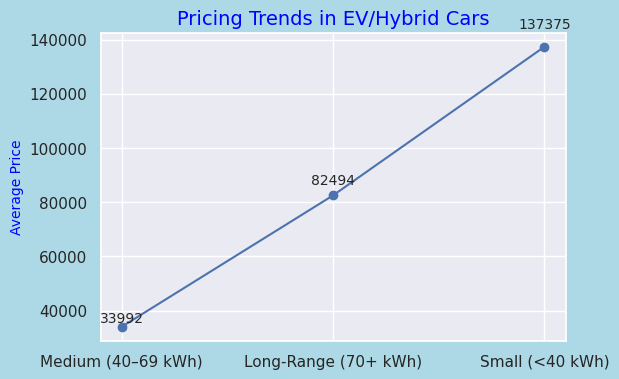

In [ ]:
plt.figure(figsize=(6,4))

seg_avg = seg_avg.sort_values()   # ascending

plt.plot(seg_avg.index, seg_avg.values, marker='o', linestyle='-')

# Add data labels
for x, y in zip(seg_avg.index, seg_avg.values):
    plt.text(x, y + 0.05*y, f"{y:.0f}", ha='center', fontsize=10)

plt.title("Pricing Trends in EV/Hybrid Cars", fontsize=14, color='blue')
plt.xlabel("")   # no x-label, like your image
plt.ylabel("Average Price", fontsize=10, color='blue')

# Optional: rotate x labels a bit and center them
plt.xticks(rotation=0)



plt.show()
